Sxx = 13.714285714285715
Syy = 114.92857142857146
Sxy = 32.35714285714286

Y-Wert real = 10 and forecast = 10.484375000000002
Y-Wert real = 12 and forecast = 12.843750000000002
Y-Wert real = 16 and forecast = 15.203125000000002
Y-Wert real = 18 and forecast = 17.5625
Y-Wert real = 22.5 and forecast = 19.921875
Y-Wert real = 20 and forecast = 17.5625
Y-Wert real = 15 and forecast = 19.921875
MSE = 5.512276785714286


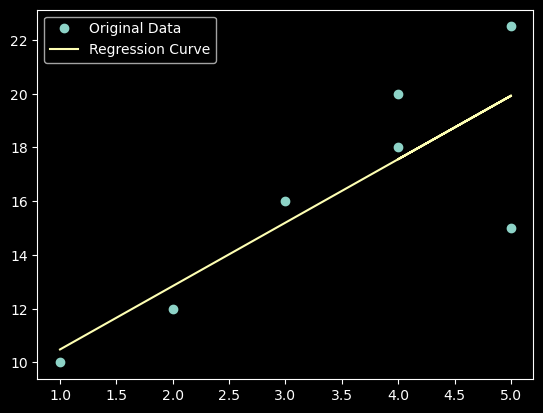

In [2]:
### IMPORT
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #for colors 

### DATA
x_values, y_values = [[1,2,3,4,5,4,5] , [10, 12, 16, 18, 22.5, 20, 15]] 

### Sxx bzw. Syy berechnen 
def CalcSxx (liste): 
    ### Mittelwert berechnen von X-Werten
    i_ = sum(liste)/len(liste) 
    ### Tabelle um Regressionsgerade zu berechnen
    columns = ['x', 'x-x_', '(x-x_)^2'] 
    table = [] 

    for i in liste: 
        # print('Für x = {} und x - x_ = {} gilt die quadratische Abweichung: {}'.format(i, i-i_, (i - i_)**2)
        table.append([i, i-i_,(i - i_)**2]) 

    np_array = np.array(table) # aus liste machen wir array 
    df = pd.DataFrame(np_array, columns=columns) 
    Sxx = sum(df['(x-x_)^2']) 
    return i_, Sxx, df # Weird hier scheint die Reihenfolge wichtig zu sein 

### Print Sxx / Syy ###
x_, Sxx, df_x = CalcSxx(x_values) 
fuck, Syy, df_y = CalcSxx(y_values) 
print('Sxx = {}'.format(Sxx)) 
print('Syy = {}'.format(Syy)) 

### Sxy berechnen
df2 = pd.concat([df_x['x-x_'], df_y['x-x_']], axis=1)
df2.columns=['x-x_', 'y-y_'] # rename columns
df2['Values'] = df2['x-x_'] * df2['y-y_'] # mnultiply rows
Sxy = sum(df2['Values']) 

### Print Sxy ###
print('Sxy = {}\n'.format(Sxy)) 
### ------------------- ###

### Berechnung der Geraden
M = Sxy / Sxx ; B = fuck - M * x_ 

def linear_gradient (X): 
    y=M*float(X)+B 
    return y 

### MEAN SQUARE ERROR ### mse = 1/n * (y_ - y)**2 # Jeder Datenpunkt wird durchgegangen y_ - y
MSE = 0 
for i in range(0,len(x_values)): 
    print('Y-Wert real = {} and forecast = {}'.format(y_values[i], linear_gradient(x_values[i])))
    MSE=MSE+1/len(x_values)*((linear_gradient(x_values[i])-y_values[i]))**2 
print('MSE = {}'.format(MSE)) 

### PLOTTEN ### 
x_regression = [] ; y_regression = [] 
for i in range(0,len(x_values)): 
    y_regression.append(linear_gradient(x_values[i])) 

colors=sns.light_palette('seagreen', 3) 
plt.style.use('dark_background') # for customizing theme
plt.plot(x_values, y_values, 'o', label="Original Data") 
plt.plot(x_values, y_regression, label="Regression Curve") 
plt.legend() 
plt.show() 
